# Contexte

Cet ensemble de données est créé uniquement à des fins d'apprentissage des concepts de segmentation de la clientèle, également connus sous le nom d'analyse du panier de la ménagère.

# Contenu

Vous êtes propriétaire d'un supermarché et, grâce aux cartes de membre, vous disposez de quelques données de base sur vos clients, telles que leur numéro d'identification, leur âge, leur sexe, leur revenu annuel et leur score de dépenses.
Le score de dépense est une donnée que vous attribuez au client en fonction de paramètres définis tels que le comportement du client et les données d'achat.

# Énoncé du problème
Vous êtes propriétaire d'un centre commercial et vous souhaitez comprendre quels sont les clients qui peuvent facilement converger [clients cibles] afin que l'équipe marketing puisse en tenir compte et planifier sa stratégie en conséquence.


# Dataset description


L'ensemble de données utilisé pour ce projet est la **Mall Customers Segmentation** Data source de Kaggle.



L'ensemble de données comprend les colonnes suivantes : CustomerID : Identifiant unique du client .

Gender : Genre du client .

Age : Âge du client .

Annual Income (k$) : Revenu annuel du client en milliers de dollars .

Spending Score (1-100) : Score de dépense du client (sur une échelle de 1 à 100, ).


# Import des données

In [3]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
df=pd.read_csv("./Mall_Customers.xls")

# Analyse exploratoire des données

## Prétaitrement des données

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop CustomerID
df_cleaned = df.drop('CustomerID', axis=1)

# Encode Gender
label_encoder = LabelEncoder()
df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])

# Preview cleaned data
df_cleaned.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Analyse descriptives

In [16]:
df_cleaned.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


Nous remarquons que l'age moyen des clients est de 38 ans et l'age maximal est de 70 ans. En moyenne leur revenu annuel est élévé avec aux score de dépense moyen du client de 50 %.

## Visualisations des données

<Axes: xlabel='Gender', ylabel='count'>

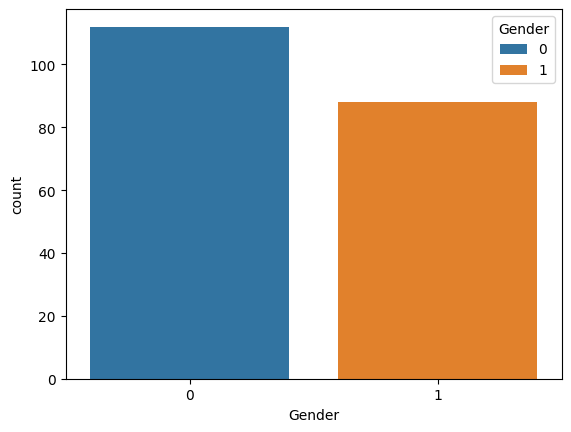

In [17]:
sns.countplot(data=df_cleaned, x="Gender",hue="Gender")

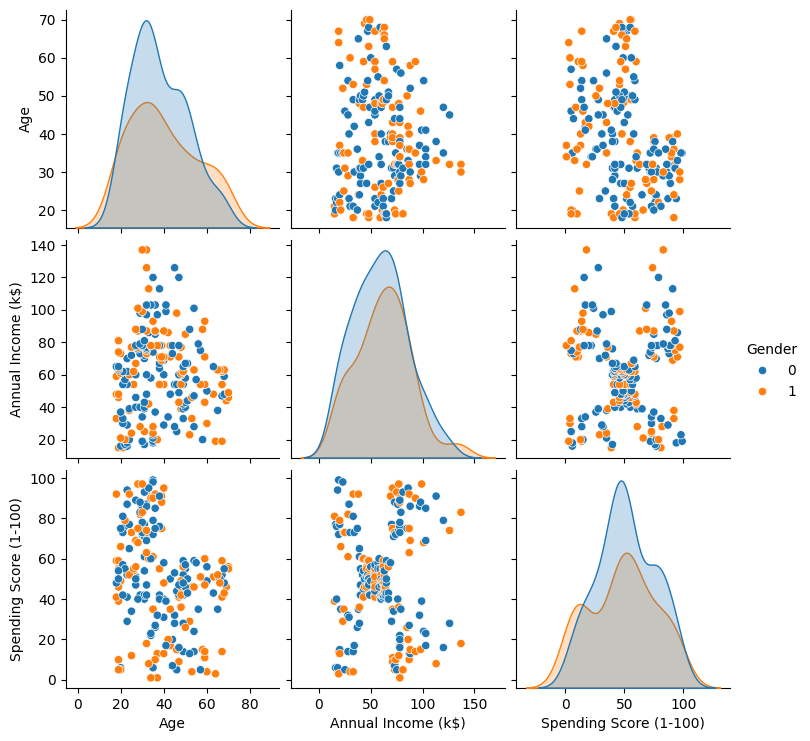

In [19]:
sns.pairplot(df_cleaned,hue="Gender")

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

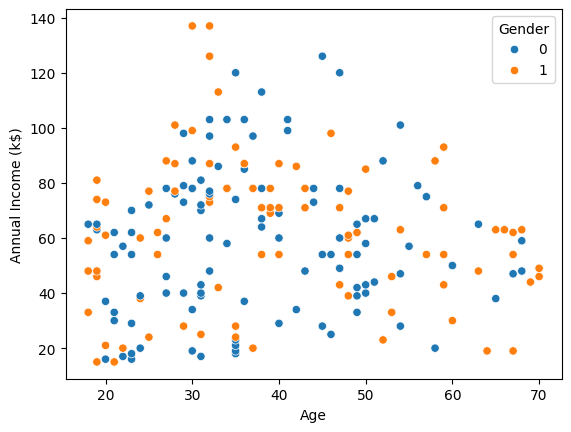

In [20]:
sns.scatterplot(df_cleaned,x='Age',y="Annual Income (k$)",hue="Gender")

Nous avons plus de femmes que d'hommes parmis les clients.



*   La repartition du salaire des hommes  en fonction de leur age est assez
varié. En majorité , ils ont un salaire reparti entre 20K et 100K de dollars. Seul quelques uns excèdent 120K de dollars
*   De même pour les femmes, seules quelques unes parviennent à avoir uns salaire au dessus de 120Kdollars




<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

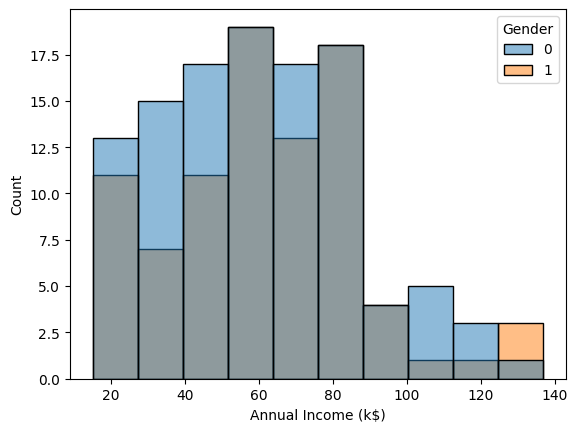

In [21]:
sns.histplot(data=df_cleaned,x=df_cleaned['Annual Income (k$)'],hue=df_cleaned['Gender'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

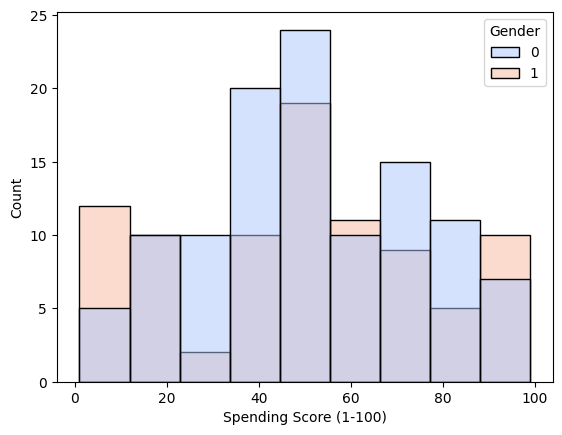

In [22]:
sns.histplot(data=df_cleaned,x=df_cleaned['Spending Score (1-100)'],hue="Gender",palette='coolwarm')


<Axes: xlabel='Age', ylabel='Count'>

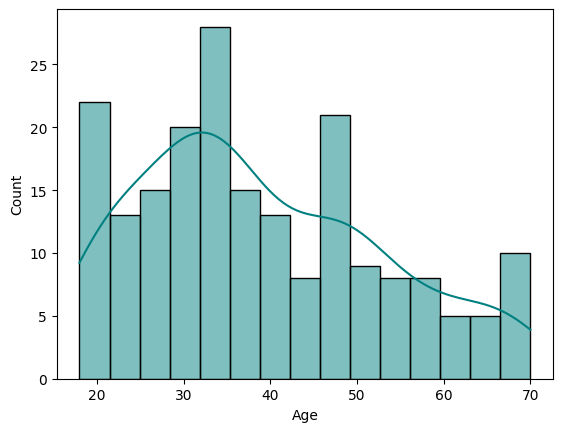

In [23]:
# 2. Age Distribution (Histogram)
sns.histplot(df_cleaned['Age'], bins=15, kde=True, color='teal')


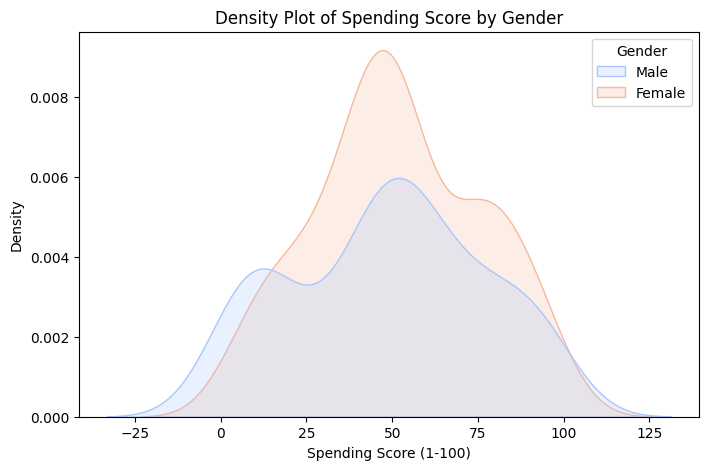

In [24]:
# 5. Density Plot of Spending Score by Gender
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="Spending Score (1-100)", hue="Gender", fill=True, palette="coolwarm")
plt.title("Density Plot of Spending Score by Gender")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Density")
plt.show()

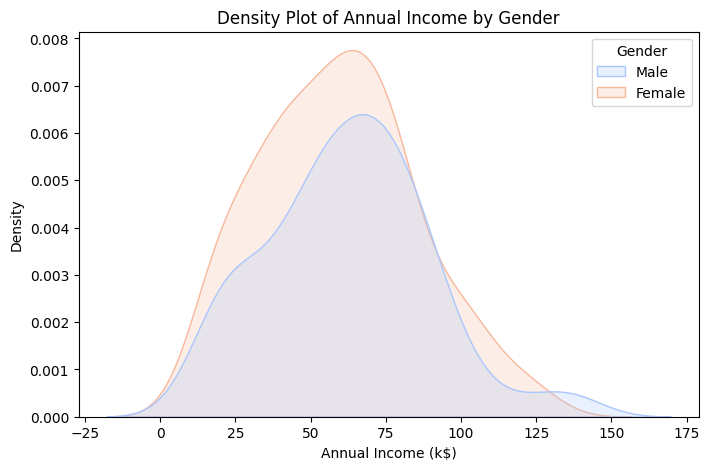

In [25]:
# 5. Density Plot of Spending Score by Gender
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Annual Income (k$)', hue="Gender", fill=True, palette="coolwarm")
plt.title("Density Plot of Annual Income by Gender")
plt.xlabel('Annual Income (k$)')
plt.ylabel("Density")
plt.show()

# DATA PREPROCESSING

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_data = scaler.fit_transform(df_cleaned)

# Convert to DataFrame for readability
import numpy as np
df_scaled = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

# Preview the scaled data
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


#  Creating Model

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# finding wcss value for different number of clusters

wcss = []
kmeans_scores={}
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_) # Inertia = WCSS (Sum of squared distances to the closest centroid)

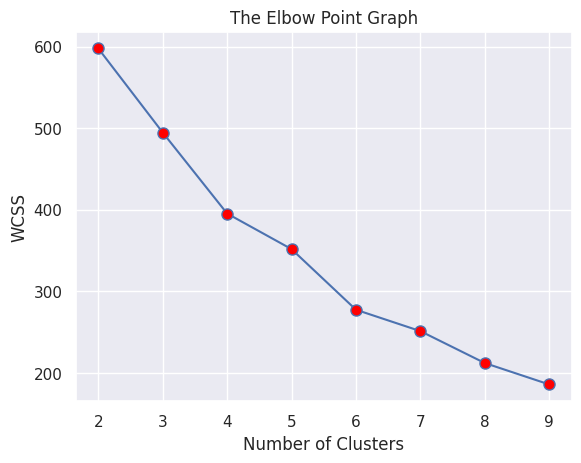

In [28]:
sns.set()
plt.plot(range(2,10), wcss, marker='o', linestyle='-', color='b', markersize=8, markerfacecolor='red')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans_scores={}
for i in range(2,11):
  labels= kmeans.fit_predict(df_scaled)
  score = silhouette_score(df_scaled, labels)
  kmeans_scores[i] = score
  print(f'K={i} --> Silhouette Score: {score:.4f}')

# Choose optimal K (highest silhouette score)
best_k = max(kmeans_scores, key=kmeans_scores.get)
print(f"Best K based on silhouette score: {best_k}")
print(kmeans_scores)


K=2 --> Silhouette Score: 0.3876
K=3 --> Silhouette Score: 0.3876
K=4 --> Silhouette Score: 0.3876
K=5 --> Silhouette Score: 0.3876
K=6 --> Silhouette Score: 0.3876
K=7 --> Silhouette Score: 0.3876
K=8 --> Silhouette Score: 0.3876
K=9 --> Silhouette Score: 0.3876
K=10 --> Silhouette Score: 0.3876
Best K based on silhouette score: 2
{2: np.float64(0.3876146244442297), 3: np.float64(0.3876146244442297), 4: np.float64(0.3876146244442297), 5: np.float64(0.3876146244442297), 6: np.float64(0.3876146244442297), 7: np.float64(0.3876146244442297), 8: np.float64(0.3876146244442297), 9: np.float64(0.3876146244442297), 10: np.float64(0.3876146244442297)}


In [30]:
optimal_k = 6  # Choose based on elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)  # Assign clusters

In [31]:
# Average characteristics per cluster
cluster_summary = df_cleaned.groupby("Cluster").mean()
print("\nCluster Characteristics:\n", cluster_summary)


Cluster Characteristics:
            Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        1.000000  57.214286           46.785714               38.714286
1        0.904762  39.000000           88.333333               14.428571
2        1.000000  28.410256           58.230769               70.717949
3        0.068966  33.206897           91.034483               72.137931
4        0.000000  25.888889           41.277778               57.944444
5        0.000000  49.914894           54.255319               36.531915


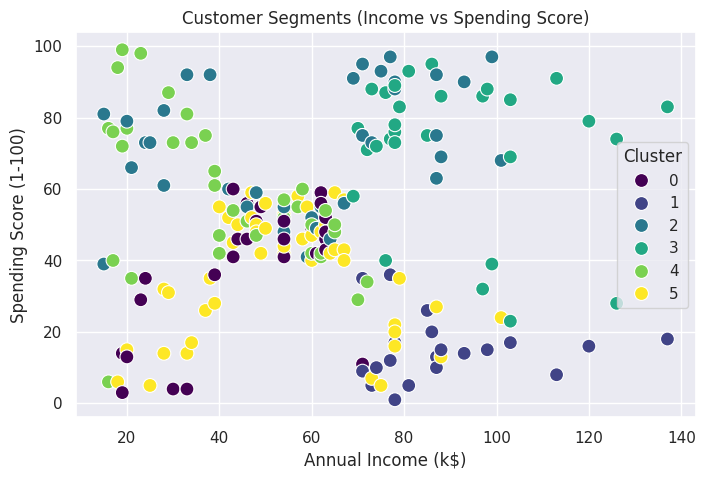

In [32]:
# Scatter plot for Income vs Spending Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["Annual Income (k$)"], y=df_cleaned["Spending Score (1-100)"], hue=df_cleaned["Cluster"], palette="viridis", s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (Income vs Spending Score)")
plt.legend(title="Cluster")
plt.show()

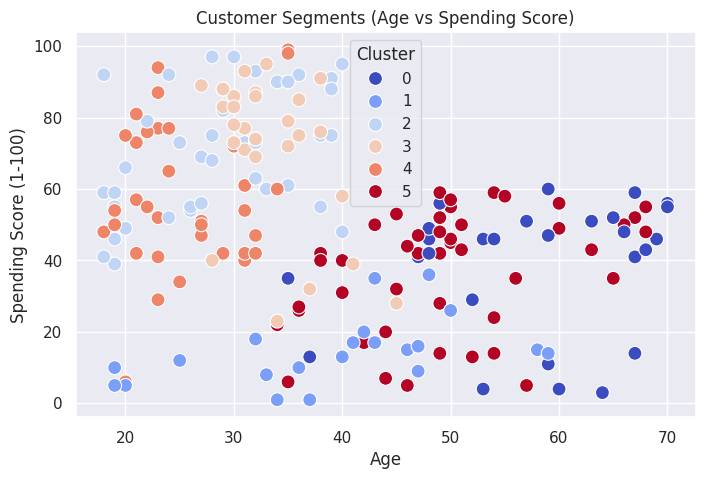

In [33]:
# Scatter plot for Age vs Spending Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["Age"], y=df_cleaned["Spending Score (1-100)"], hue=df_cleaned["Cluster"], palette="coolwarm", s=100)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (Age vs Spending Score)")
plt.legend(title="Cluster")
plt.show()

Exemple de segments typiques pour ce dataset :

    Clients à revenu élevé / dépenses faibles (Économes).

    Revenu moyen / dépenses moyennes (Normaux).

    Revenu élevé / dépenses élevées (Cibles premium).

    Revenu faible / dépenses élevées (Dépensiers impulsifs).

    Revenu faible / dépenses faibles (Budget serré)

In [34]:
import joblib

# Sauvegarde du modèle et du scaler
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaled_data, "scaler.pkl")

# Pour charger plus tard :
# kmeans = joblib.load("kmeans_model.pkl")
# scaler = joblib.load("scaler.pkl")

['scaler.pkl']